###Assignment 5: Decision Tree
Team: White Walkers
Student Names:
Pratik Dhumal (SJSU ID: 012457185)
Sourabh Namilikonda (SJSU ID: 012414948)
Hrishikesh Rendalkar (SJSU ID: 011485994)
Hemambujam Veeraraghavan (SJSU ID: 012482392)
Business Objective:
Being software engineers, we develop a number of mobile applications. We wanted to get an insight on the kind of application that are present in the market and work towards an application that would be suitable and useful for the consumers. Hence we decided to gather data on the the available applications in the play store, and perform data analysis on these applications and the user reviews.

##Dataset:
The Playstore dataset we have chosen for this assignment holds data with regards to user ratings, reviews, size, number of installs and the price of the applications. This dataset had ample data, with about 4000 sample data, which served to be useful for the decision making algorithm.

##Data Wrangling:
Using data from the above-mentioned dataset, we converted data from a plain text format to a list of lists in Python, that can be used for our assignment purpose.

##Data Interpretation:
With the cleaned datset,We are trying to predict the decision of downloading an application from google play store which will be based on 4 factors ratings,reviews,no of downloads and size. 

##Future Enhancements:
In Future, we want to compare the apps from this playstore(Google) to other playstores(Apple) to get app popularity among different platforms and devices

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pyexcel_ods import get_data
%matplotlib inline

In [164]:
df = pd.read_excel('playstore.xlsx')

In [165]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null datetime64[ns]
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
#dataFrame=df.columns[2:6]
#dataFrame
dataFrame=df[['Rating','Reviews','Size','Installs']]
dataFrame['Rating'].fillna(0, inplace = True)
dataFrame

/home/pratik/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Rating,Reviews,Size,Installs
0,4.1,159,19M,"10,000+"
1,3.9,967,14M,"500,000+"
2,4.7,87510,8.7M,"5,000,000+"
3,4.5,215644,25M,"50,000,000+"
4,4.3,967,2.8M,"100,000+"
5,4.4,167,5.6M,"50,000+"
6,3.8,178,19M,"50,000+"
7,4.1,36815,29M,"1,000,000+"
8,4.4,13791,33M,"1,000,000+"
9,4.7,121,3.1M,"10,000+"


In [168]:
#data purification
#data['Rating'].fillna(0, inplace = True)


def purify_rating(X):
    for ind,s in enumerate(X):
        if s>5:
            print(ind, s)
            X[ind]=s/10
    return X

def purify_price(s):
    s=s.replace("Everyone","0")
    return s.replace("$","")

def purify_installs(s):
    #print(type(s) )
    s=s.replace("+","")
    s=s.replace("Free","0")
    return s.replace(",","")

def purify_size(s):
    #print(type(s) )
    s=s.replace(",","")
    s=s.replace("+","")
    s=s.replace("M","")
    s=s.replace("k","")
    return s.replace("Varies with device","0")

###Here we are preparing the data by:
Manual analysis of dataset
Removal of NaN values and replacing by a mean default value
Next defining functions for removal of outlier data and symbols to get numeric features

In [169]:
dataFrame['Rating']=purify_rating(dataFrame['Rating'])
dataFrame['Rating']= list(map(float, dataFrame['Rating']))

dataFrame

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rating,Reviews,Size,Installs
0,4.1,159,19M,"10,000+"
1,3.9,967,14M,"500,000+"
2,4.7,87510,8.7M,"5,000,000+"
3,4.5,215644,25M,"50,000,000+"
4,4.3,967,2.8M,"100,000+"
5,4.4,167,5.6M,"50,000+"
6,3.8,178,19M,"50,000+"
7,4.1,36815,29M,"1,000,000+"
8,4.4,13791,33M,"1,000,000+"
9,4.7,121,3.1M,"10,000+"


In [170]:
dataFrame['Installs'] = [purify_installs(str(s)) for s in dataFrame['Installs']]
dataFrame['Installs'] = list(map(float, dataFrame['Installs']))
dataFrame

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rating,Reviews,Size,Installs
0,4.1,159,19M,10000.0
1,3.9,967,14M,500000.0
2,4.7,87510,8.7M,5000000.0
3,4.5,215644,25M,50000000.0
4,4.3,967,2.8M,100000.0
5,4.4,167,5.6M,50000.0
6,3.8,178,19M,50000.0
7,4.1,36815,29M,1000000.0
8,4.4,13791,33M,1000000.0
9,4.7,121,3.1M,10000.0


In [171]:
dataFrame['Size'] = [purify_size(str(s)) for s in dataFrame['Size']]
dataFrame['Size'] = list(map(float, dataFrame['Size']))
dataFrame

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rating,Reviews,Size,Installs
0,4.1,159,19.0,10000.0
1,3.9,967,14.0,500000.0
2,4.7,87510,8.7,5000000.0
3,4.5,215644,25.0,50000000.0
4,4.3,967,2.8,100000.0
5,4.4,167,5.6,50000.0
6,3.8,178,19.0,50000.0
7,4.1,36815,29.0,1000000.0
8,4.4,13791,33.0,1000000.0
9,4.7,121,3.1,10000.0


In [172]:
def addNewColumnForBoolean(installs,size,reviews,rating):
    if installs > 10000 and size < 30 and reviews > 1500 and rating > 4.4:
        val = 'Yes'
    else:
        val = 'No'
    return val

###1>We are adding new column Probability_Downloading which depends on this function because we dont have any boolean value.
2>This function prepares boolean value which is based on 4 values Installs,Size,Reviews,Rating.

In [173]:
#dataFrame['Probability_Downloading'] =[addNewColumnForBoolean(installs,size) for installs in dataFrame['Installs'] ]
#for x in range(0, 10840):
#    installs=dataFrame['Installs'];
#    size=dataFrame['Size'];
#    reviews=dataFrame['Reviews'];
#    rating=dataFrame['Rating'];
#    dataFrame['Probability_Downloading'] =addNewColumnForBoolean(installs,size,reviews,rating)
list_value=[]
for index, row in dataFrame.iterrows():
    list_value.append(addNewColumnForBoolean(row['Installs'],row['Size'],row['Reviews'],row['Rating']))
   
    
dataFrame['Probability_Downloading']=list_value
dataFrame

/home/pratik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Rating,Reviews,Size,Installs,Probability_Downloading
0,4.1,159,19.0,10000.0,No
1,3.9,967,14.0,500000.0,No
2,4.7,87510,8.7,5000000.0,Yes
3,4.5,215644,25.0,50000000.0,Yes
4,4.3,967,2.8,100000.0,No
5,4.4,167,5.6,50000.0,No
6,3.8,178,19.0,50000.0,No
7,4.1,36815,29.0,1000000.0,No
8,4.4,13791,33.0,1000000.0,No
9,4.7,121,3.1,10000.0,No


In [174]:
dataFrame

,Rating,Reviews,Size,Installs,Probability_Downloading
0,4.1,159,19.0,10000.0,No
1,3.9,967,14.0,500000.0,No
2,4.7,87510,8.7,5000000.0,Yes
3,4.5,215644,25.0,50000000.0,Yes
4,4.3,967,2.8,100000.0,No
5,4.4,167,5.6,50000.0,No
6,3.8,178,19.0,50000.0,No
7,4.1,36815,29.0,1000000.0,No
8,4.4,13791,33.0,1000000.0,No
9,4.7,121,3.1,10000.0,No


In [175]:
x=dataFrame.drop('Probability_Downloading',axis=1)
x

,Rating,Reviews,Size,Installs
0,4.1,159,19.0,10000.0
1,3.9,967,14.0,500000.0
2,4.7,87510,8.7,5000000.0
3,4.5,215644,25.0,50000000.0
4,4.3,967,2.8,100000.0
5,4.4,167,5.6,50000.0
6,3.8,178,19.0,50000.0
7,4.1,36815,29.0,1000000.0
8,4.4,13791,33.0,1000000.0
9,4.7,121,3.1,10000.0


In [176]:
dataFrame

,Rating,Reviews,Size,Installs,Probability_Downloading
0,4.1,159,19.0,10000.0,No
1,3.9,967,14.0,500000.0,No
2,4.7,87510,8.7,5000000.0,Yes
3,4.5,215644,25.0,50000000.0,Yes
4,4.3,967,2.8,100000.0,No
5,4.4,167,5.6,50000.0,No
6,3.8,178,19.0,50000.0,No
7,4.1,36815,29.0,1000000.0,No
8,4.4,13791,33.0,1000000.0,No
9,4.7,121,3.1,10000.0,No


In [177]:
y=dataFrame['Probability_Downloading']

#adding some randomness to the dataset to make it more realistic
for index, row in dataFrame.iterrows():
    if(index%11==0 or index%13==0 or index%17==0 or index%19==0):
        row['Probability_Downloading'].replace("No","Yes")
        
       
   # print(str(index) +" "+ row['Probability_Downloading']+" "+y)
y=dataFrame['Probability_Downloading'] 

In [178]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
#We are using classification instead of Regressor as suggested by professor
dtree=DecisionTreeClassifier()

In [181]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [182]:
#Trying to predict and checking accuracy
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9993082776112521


In [183]:
#libraries to draw decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [184]:
dataFrame

,Rating,Reviews,Size,Installs,Probability_Downloading
0,4.1,159,19.0,10000.0,No
1,3.9,967,14.0,500000.0,No
2,4.7,87510,8.7,5000000.0,Yes
3,4.5,215644,25.0,50000000.0,Yes
4,4.3,967,2.8,100000.0,No
5,4.4,167,5.6,50000.0,No
6,3.8,178,19.0,50000.0,No
7,4.1,36815,29.0,1000000.0,No
8,4.4,13791,33.0,1000000.0,No
9,4.7,121,3.1,10000.0,No


In [185]:
features = list(dataFrame.columns[0:4])


In [186]:
features

['Rating', 'Reviews', 'Size', 'Installs']

In [187]:
dot_data = StringIO()  


In [188]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###Here we are using graphviz library which needs to be installed before using it command:
sudo apt install python-pydot python-pydot-ng graphviz (for Ubuntu)
These are all the libraries which are used for plotting decision tree.

In [189]:
#we need pass features columns and dtree to graphviz 
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [190]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

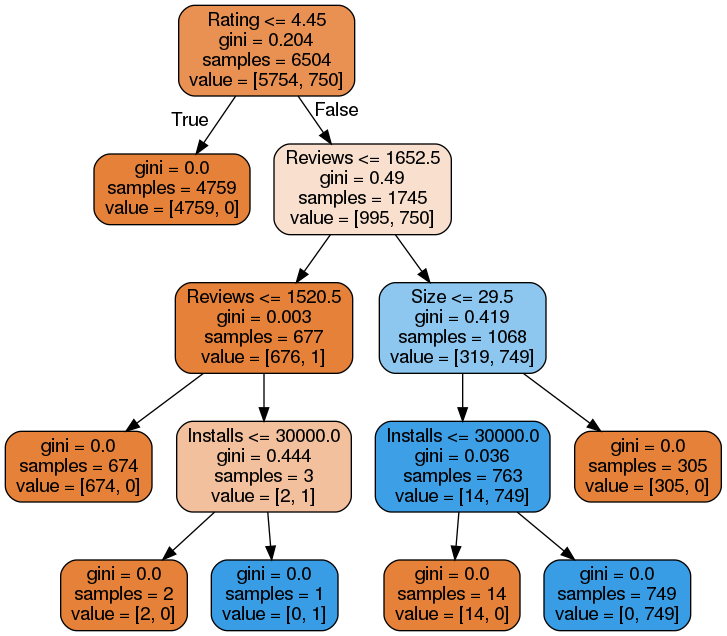

In [191]:
Image(graph[0].create_png())    

###Assumptions:Binary column already exists with probability of downloading
Observations:
We are trying to predict here wether user will download the app from playstore or not and whats the best way to split the data in manner such that we can predict the outcome of user.
The accuracy is 0.99% which more that 0.7.